<a href="https://colab.research.google.com/github/ambitama-poddar/EPayLater_assignment/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns


In [121]:
# Load and read the dataset from CSV file
data = pd.read_csv("housing_data.csv")

#Statistical Details of the dataset
data.describe()

,Bedrooms,Bathrooms,SquareFootage,SalePrice
count,67.000000,67.000000,67.000000,67.000000
mean,2.820896,2.044776,1749.253731,253432.835821
std,0.936230,0.689375,504.937180,65007.044812
min,1.000000,1.000000,900.000000,150000.000000
25%,2.000000,1.500000,1200.000000,190000.000000
50%,3.000000,2.000000,1900.000000,260000.000000
75%,4.000000,2.500000,2200.000000,320000.000000
max,4.000000,3.000000,2400.000000,350000.000000


In [122]:
# Split the data into training and testing sets
train_data = data.iloc[:50]
test_data = data.iloc[50:]

In [123]:
columns_to_use = data.columns
print(columns_to_use)

Index(['Bedrooms', ' Bathrooms', ' SquareFootage', ' Location', ' SalePrice'], dtype='object')


# Simple Linear Regression

In [125]:
# Separate the features and target variable for training data
x_train = train_data[[' SquareFootage']]
y_train = train_data[' SalePrice']

# Separate the features and target variable for testing data
x_test = test_data[[' SquareFootage']]
y_test = test_data[' SalePrice']


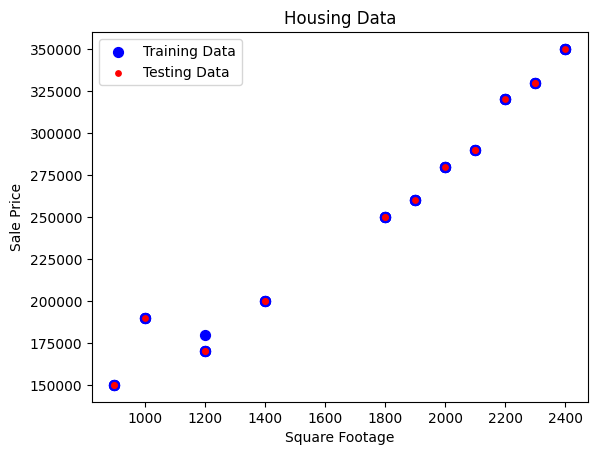

In [126]:
# Plot the training data
plt.scatter(x_train, y_train, color='blue',s=50, label='Training Data')

# Plot the testing data
plt.scatter(x_test, y_test, color='red',s=15, label='Testing Data')

# Set labels and title
plt.xlabel('Square Footage')
plt.ylabel('Sale Price')
plt.title('Housing Data')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [127]:
# Create a Linear Regression model
model = LinearRegression()

In [128]:
# Train the model using the training data
model.fit(x_train, y_train)

LinearRegression()

In [129]:
# Make predictions on the testing data
y_pred = model.predict(x_test)
print(y_pred)

Accuracy = r2_score(y_test, y_pred) * 100
Accuracy

[209949.48435306 323188.45725537 298024.24105486 147038.94385178
 184785.26815255 260277.91675409 310606.34915511 159621.05195203
 285442.1329546  335770.56535563 272860.02485434 209949.48435306
 323188.45725537 298024.24105486 147038.94385178 184785.26815255
 260277.91675409]


96.58388509217389

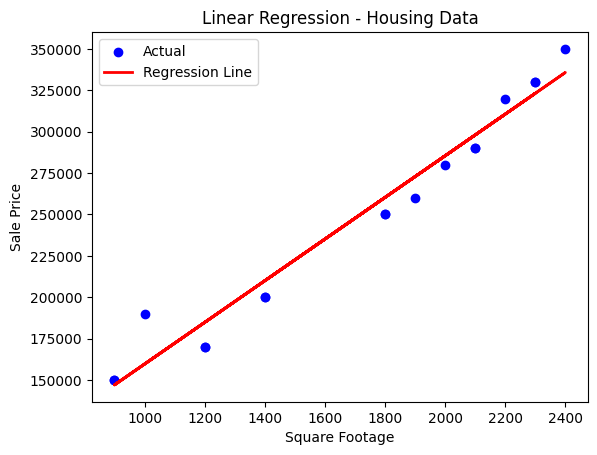

In [130]:
# Plot the actual prices and predicted prices
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('Sale Price')
plt.title('Linear Regression - Housing Data')
plt.legend()
plt.show()

In [131]:
# Calculate the root mean squared error (RMSE) between predicted and actual prices
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 12112.622921332371


In [132]:
# Save the trained model to a file for future use
joblib.dump(model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

# Multiple Linear Regression

In [133]:
x = data.iloc[:, :4]
y = data.iloc[:, 4]

In [134]:
ohe = OneHotEncoder(sparse=False)
x = ohe.fit_transform(data[[" Location"]])
ohe.categories_

c:\Users\Ambitama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array([' A', ' B', ' C'], dtype=object)]

In [140]:
col_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), [" Location"]),remainder="passthrough"
)

# Transform the data
x = col_trans.fit_transform(data.drop(" SalePrice", axis=1))


In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("Y_train:", y_train.shape)
print("Y_test:", y_test.shape)

X_train: (53, 6)
X_test: (14, 6)
Y_train: (53,)
Y_test: (14,)


In [143]:
# Build a multiple linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [144]:
y_pred = model.predict(x_test)
y_pred

array([271849.86594776, 315236.46244654, 167954.76196687, 262460.84724698,
       136379.63615785, 340894.48565903, 265079.8568796 , 133760.62652523,
       170573.7715995 , 336720.09038162, 331418.88605735, 136379.63615785,
       283747.91753841, 265079.8568796 ])

In [145]:
Accuracy = r2_score(y_test, y_pred) * 100
print(" Accuracy of the model is %.2f" % Accuracy)

 Accuracy of the model is 96.34


Text(0, 0.5, 'Predicted')

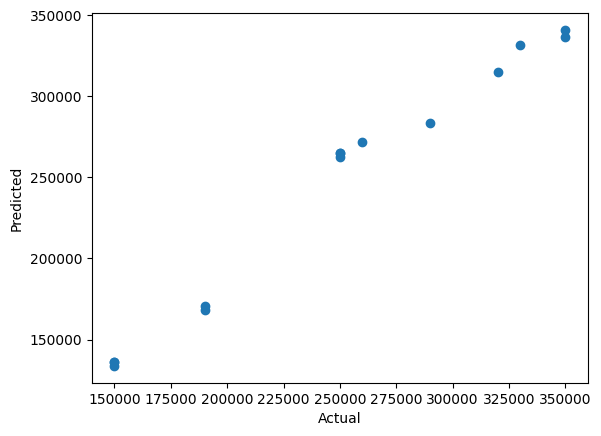

In [146]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel=' SalePrice'>

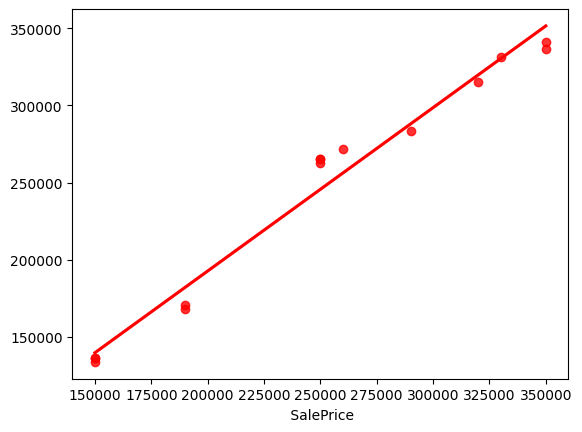

In [147]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")

In [148]:
pred_df = pd.DataFrame(
{"Actual Value": y_test, "Predicted Value": y_pred, "Difference": y_test -y_pred}
)
pred_df

,Actual Value,Predicted Value,Difference
27,260000,271849.865948,-11849.865948
56,320000,315236.462447,4763.537553
35,190000,167954.761967,22045.238033
33,250000,262460.847247,-12460.847247
31,150000,136379.636158,13620.363842
48,350000,340894.485659,9105.514341
22,250000,265079.856880,-15079.856880
42,150000,133760.626525,16239.373475
46,190000,170573.771599,19426.228401
26,350000,336720.090382,13279.909618


In [150]:
# Calculate the root mean squared error (RMSE) between predicted and actual prices
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 13553.261075196435


In [151]:
# Save the trained model to a file for future use
joblib.dump(model, "multiple_linear_regression_model.joblib")

['multiple_linear_regression_model.joblib']